In [1]:
import nibabel
import os
from pathlib import Path
import numpy as np

In [2]:
def parse_labels(raw_csv_file, output_file):
    
    import csv
    csv_columns = ['run','trial','global time', 'run time', 'morph level', 'couple', 'response', 'response time']
    csv_file = output_file
    
    f = open(raw_csv_file)
    all_lines = f.readlines()
    
    to_be_added = []
    morph_level = None
    couple = None
    is_complete = False
    new_morph = False
    nb_item = 0
    nb_run = 0
    first_morph = True
    
    def get_indices(all_lines, to_find='Debut_run '):
        indices = []
        for count, line in enumerate(all_lines):
            if line.find(to_find) > -1:
                indices += [count]
        return indices + [len(all_lines)]
    
    run_starts = get_indices(all_lines, 'Debut_run ')
    
    for nb_run in range(len(run_starts) - 1):
        
        run_start = run_starts[nb_run]
        run_stop = run_starts[nb_run + 1]
        
        sub_lines = all_lines[run_start:run_stop]
        
        syncro_line = get_indices(sub_lines, 'Synchro_IRM')
        global_t_start = int(sub_lines[syncro_line[0]].split(',')[0])

        morph_starts = get_indices(sub_lines, 'MORPH')
        
        for nb_item in range(len(morph_starts)-1):
        
            morph_start = morph_starts[nb_item]
            morph_stop = morph_starts[nb_item + 1]
            response = 0
            response_time = None
        
            for line in sub_lines[morph_start:morph_stop]:
                if line.find('morph_') > -1:
                    file_name = line.split(',')[3].split(' ')[1]
                    file_name = file_name.split("\\")[2]
                    morph_level = int(file_name.split('_')[1])
                    couple = int(file_name.split('_')[2].split('.')[0])
                    t_start = int(line.split(',')[3].split(' ')[2])

                if line.find('bouton_1') > -1:
                    response = 1
                    response_time = int(line.split(',')[3].split(' ')[1]) + 500

            to_add = {'run' : nb_run + 1, 
                      'trial' : nb_item + 1,
                       'global time' : t_start, 
                       'run time' :  t_start - global_t_start,
                       'morph level' : morph_level,
                       'couple' : couple, 
                       'response' : response, 
                       'response time' : response_time}
            to_be_added += [to_add]

    try:
        with open(output_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
            writer.writeheader()
            for data in to_be_added:
                writer.writerow(data)
    except IOError:
        print("I/O error")

In [6]:
import os
for file in os.listdir(Path("morph/labels/raw")):
    parse_labels(Path("morph/labels/raw") / file, Path("morphs/labels") / file)

I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error
I/O error


In [9]:
def view_results(subject=1, run='all', return_data=False, do_plot=True):

    import pandas
    from pathlib import Path

    labels = pandas.read_csv(f'morph/labels/labels_{subject}.csv')
    
    if run == 'all':
        x = labels['morph level']
        y = labels['response']
        z = labels['response time']
    elif run in range(1, 5):
        mask = labels['run'] == run
        x = labels[mask]['morph level']
        y = labels[mask]['response']
        z = labels[mask]['response time']
    
    import pylab as plt
    values, counts = np.unique(x, return_counts=True)

    results = {}
    results['response'] = {'mean' : np.zeros(len(values)), 'std' : np.zeros(len(values))}
    results['response_time'] = {'mean' : np.zeros(len(values)), 'std' : np.zeros(len(values))}
    for count, v in enumerate(values):
        mask = (x == v)
        results['response']['mean'][count] = np.mean(y[mask])
        results['response']['std'][count] = np.std(y[mask])/np.sqrt(np.sum(mask))

        results['response_time']['mean'][count] = np.mean(z[mask])
        results['response_time']['std'][count] = np.std(z[mask])/np.sqrt(np.sum(mask))

    if do_plot:
        fig, ax = plt.subplots(ncols=2, squeeze=False, figsize=(15,5))
        ax[0,0].plot(values, results['response']['mean'])
        ax[0,0].fill_between(values, results['response']['mean'] - results['response']['std'], 
                         results['response']['mean'] + results['response']['std'], alpha=0.25)
        ax[0,0].set_xlabel('% morph')
        ax[0,0].set_ylabel('response')

        ax[0,1].plot(values, results['response_time']['mean'])
        ax[0,1].fill_between(values, results['response_time']['mean'] - results['response_time']['std'], 
                         results['response_time']['mean'] + results['response_time']['std'], alpha=0.25)
        ax[0,1].set_xlabel('% morph')
        ax[0,1].set_ylabel('response time (ms)')
    
    if return_data:
        return results

Seuil d'inflexion pour les données 1 : 6.917209987623063e+01


/tmp/ipykernel_283969/2863380964.py:7: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


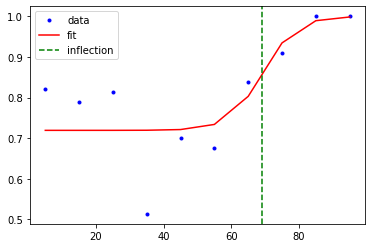

Seuil d'inflexion pour les données 2 : 2.7391383619530046e+01


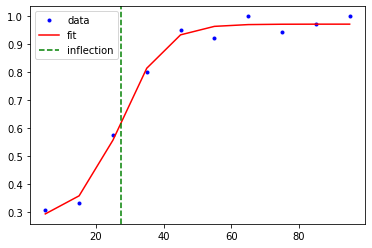

Seuil d'inflexion pour les données 3 : 5.74210401661183e+01


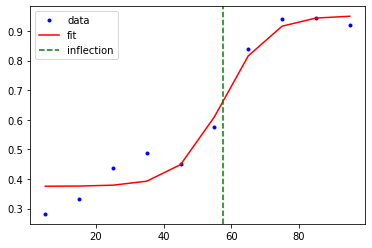

Seuil d'inflexion pour les données 4 : 6.435604836384617e+01


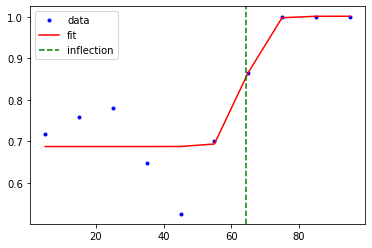

Seuil d'inflexion pour les données 5 : 5.877816003487003e+01


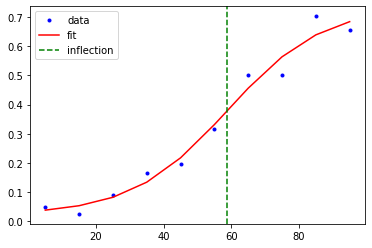

Seuil d'inflexion pour les données 6 : 5.028509039630935e+01


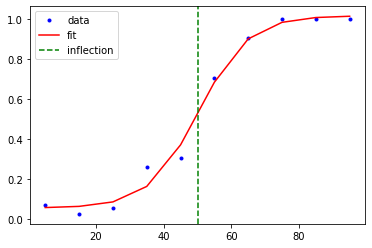

Seuil d'inflexion pour les données 7 : 5.295310514095329e+01


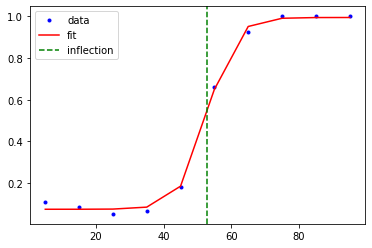

Seuil d'inflexion pour les données 8 : 4.937764064429008e+01


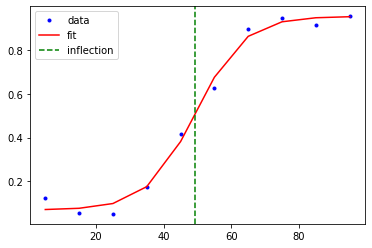

Seuil d'inflexion pour les données 9 : 1.0042814344553705e+02


/tmp/ipykernel_283969/2863380964.py:7: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
/home/cure/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


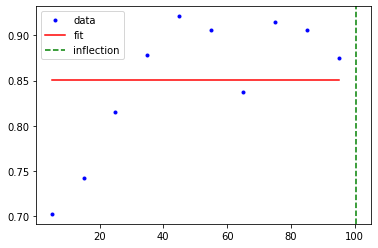

Seuil d'inflexion pour les données 10 : 6.02764452100035e+01


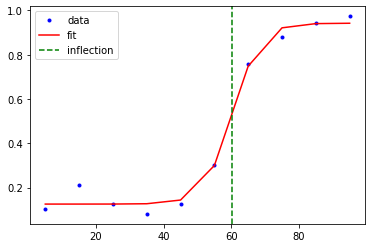

Seuil d'inflexion pour les données 11 : 4.9102630660261404e+01


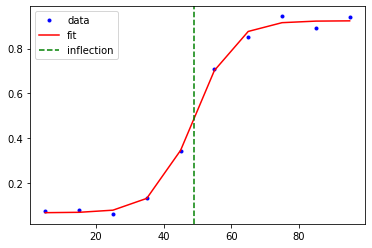

Seuil d'inflexion pour les données 12 : 5.240204827564586e+01


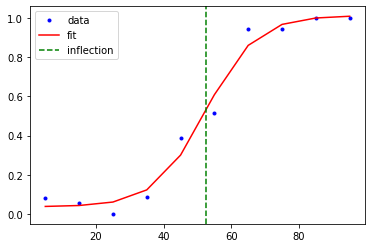

Seuil d'inflexion pour les données 13 : 4.708370139402566e+01


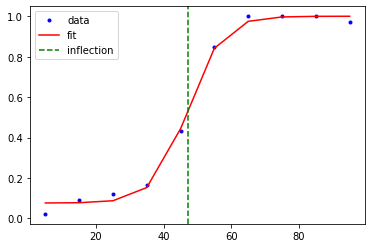

Seuil d'inflexion pour les données 14 : 5.0921817877349014e+01


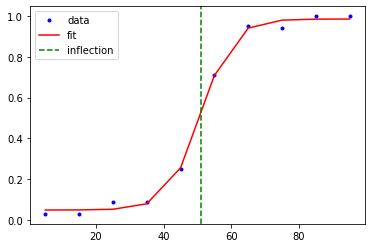

Seuil d'inflexion pour les données 15 : 3.5066263986507074e+01


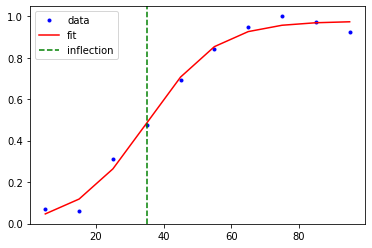

Seuil d'inflexion pour les données 16 : 5.213513529870898e+01


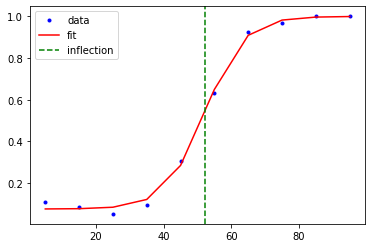

Seuil d'inflexion pour les données 17 : 4.2422115669550536e+01


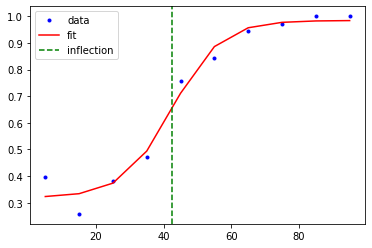

Seuil d'inflexion pour les données 18 : 5.3708452119272465e+01


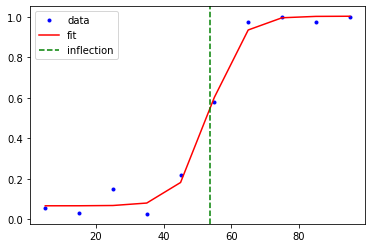

Seuil d'inflexion pour les données 19 : 4.9725208291106775e+01


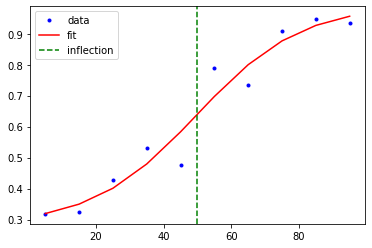

Seuil d'inflexion pour les données 20 : 4.5332364126184025e+01


/tmp/ipykernel_283969/2863380964.py:7: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


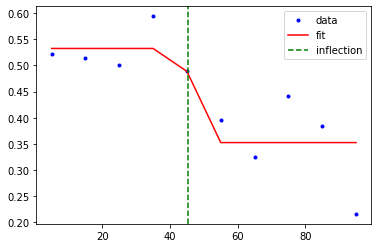

Seuil d'inflexion pour les données 21 : 5.92495552641867e+01


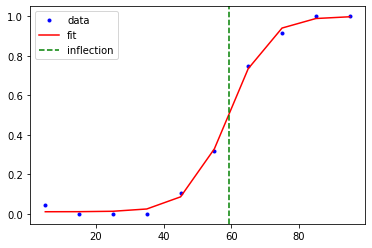

Seuil d'inflexion pour les données 22 : 5.266039351979201e+01


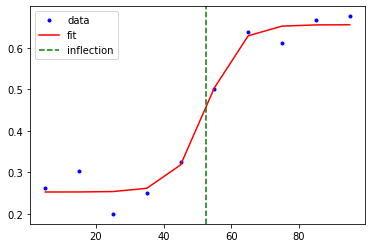

Seuil d'inflexion pour les données 23 : 6.002064931578625e+01


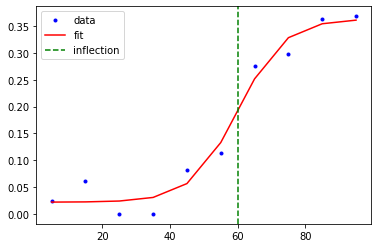

Seuil d'inflexion pour les données 24 : 5.547222161054746e+01


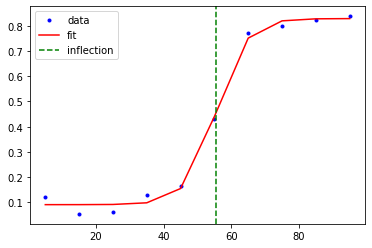

Seuil d'inflexion pour les données 25 : 6.117305994976107e+01


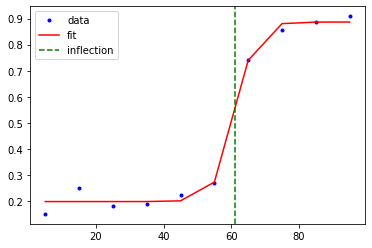

<Figure size 432x288 with 0 Axes>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# définir la fonction sigmoidale
def sigmoid(x, L, x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return y

# définir la fonction pour calculer le seuil d'inflexion
def inflection_point(L, x0):
    return x0

res = []

# boucle sur les données pour chaque i
for i in range (1,26):
    # récupérer les données
    results = view_results(i, return_data=True, do_plot=False)
    xdata = np.linspace(5, 95, 10)
    ydata = results['response']['mean']

    # ajuster la fonction sigmoidale aux données
    p0 = [max(ydata), np.median(xdata), 1, min(ydata)]
    popt, pcov = curve_fit(sigmoid, xdata, ydata, p0)

    # calculer le seuil d'inflexion
    inflection = inflection_point(*popt[0:2])
    print('Seuil d\'inflexion pour les données', i, ':', inflection)

    # tracer les données et la courbe ajustée
    plt.plot(xdata, ydata, 'b.', label='data')
    plt.plot(xdata, sigmoid(xdata, *popt), 'r-', label='fit')
    plt.axvline(inflection, color='g', linestyle='--', label='inflection')
    plt.legend()
    plt.show()
    plt.savefig(f'subject_{i}.png')
    res += [inflection_point(*popt[0:2])]

res = np.array(res)








In [20]:
import pandas
labels = pandas.read_csv(f'morph/labels/labels_1.csv')
labels

,run,trial,global time,run time,morph level,couple,response,response time
0,1,1,35172,847,15,4,1,558.0
1,1,2,40374,6049,95,1,1,846.0
2,1,3,45376,11051,75,9,1,843.0
3,1,4,49378,15053,5,2,0,NaN
4,1,5,55281,20956,45,7,1,888.0
...,...,...,...,...,...,...,...,...
360,4,86,2246383,453129,35,4,1,695.0
361,4,87,2250185,456931,85,5,1,800.0
362,4,88,2255587,462333,95,7,1,612.0
363,4,89,2259489,466235,25,6,1,507.0


(array([ 1.,  1.,  4., 10.,  6.,  2.,  0.,  0.,  0.,  1.]),
 array([ 27.39138362,  34.6950596 ,  41.99873558,  49.30241157,
         56.60608755,  63.90976353,  71.21343952,  78.5171155 ,
         85.82079148,  93.12446746, 100.42814345]),
 <BarContainer object of 10 artists>)

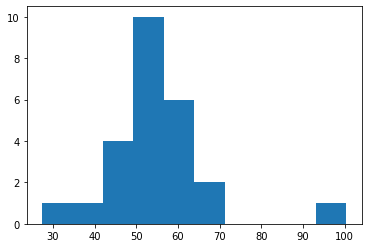

In [16]:
plt.hist(res)
